In [1]:
#Author: jgathas
#date: 4/28/2024
#class: CS496
#This is a notebook that uses QuTip to make a quantum teleprotation circuit


Be sure to have Qutip Installed before running this notebook. <br>
pip install qutip <br>
pip install qutip-qip

Note: you will need to install Ghostscript, Imagemagick, and Perl in order to get the circuit schematic drawing to appear in the notebook.

This is a notebook that uses QuTip to make a quantum teleportation circuit. We first need to import all necessary math and QuTip libraries

In [2]:
#importing necessary packages
from math import sqrt

from qutip import about, basis, tensor #importing qutip basics
from qutip_qip.circuit import QubitCircuit #creating quatum circuit objects
from qutip_qip.operations import Measurement, cnot, snot  #cnot and snot are only needed to see gate matricies


We will need 2 classical wires and 3 qubit wires to accomplish the Quantum Teleportation circuit. The first qubit represents the state q0 = |psi> that needs to be transferred from Alice to Bob.

In [5]:
#Here we create a QubitCircuit object of 3 qubits and 2 classical btis
teleportation = QubitCircuit(
    3, num_cbits=2, input_states=[r"\psi", "0", "0", "c0", "c1"]  #3 qubits and 2 control classical bits and their names
)

First, we need to create a shared EPR pair between Alice and Bob (|00> + |11>)/2, between qubits q1 and q2. We can do this with a hadamard on Alice's qubit and then a CNOT entagling gate.

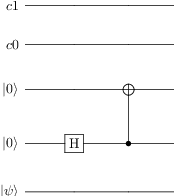

In [6]:
teleportation.add_gate("SNOT", targets=[1])  #SNOT = hadamrad gate
teleportation.add_gate("CNOT", targets=[2], controls=[1])  #adding CNOT on q2 with q1 as control

#draw circuit up to this point
teleportation.png

If we want to see the operator matrix that is applied from each gate, we can simply call the gate as a function.

In [7]:
cnot()

Quantum object: dims=[[2, 2], [2, 2]], shape=(4, 4), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

In [8]:
snot()

Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

We now make q0 interact with Alice's EPR pair qubit, followed by measuring the two qubits that belong to Alice at this point (q0 and q1). The result of the measurement q0 is stored in classical bit c1 and the result of q1 in classical bit c2.

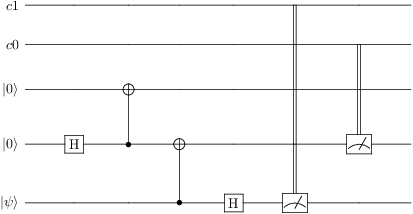

In [9]:
teleportation.add_gate("CNOT", targets=[1], controls=[0])
teleportation.add_gate("SNOT", targets=[0])

teleportation.add_measurement("M0", targets=[0], classical_store=1) #measure q0 and store on c1
teleportation.add_measurement("M1", targets=[1], classical_store=0) #measure q1 and store on c0

#draw circuit up to this point
teleportation.png

Next, we apply an X gate on Bob's qubit based on the classical control c0 and Z gate based on classical control c1, yeilding the following results:<br>
c1c0 <br>
|00> = No operation<br>
|01> = Z<br>
|10> = X<br>
|11> = ZX<br>

In [10]:
teleportation.add_gate("X", targets=[2], classical_controls=[0]) #add X controlled by c0
teleportation.add_gate("Z", targets=[2], classical_controls=[1]) #add Z controlled by c1

We can see the gates listed in our circuit and the final schematic using the follwoing two line of code:

In [11]:
teleportation.gates #list circuit elements

[Gate(SNOT, targets=[1], controls=None, classical controls=None, control_value=None, classical_control_value=None),
 Gate(CNOT, targets=[2], controls=[1], classical controls=None, control_value=1, classical_control_value=None),
 Gate(CNOT, targets=[1], controls=[0], classical controls=None, control_value=1, classical_control_value=None),
 Gate(SNOT, targets=[0], controls=None, classical controls=None, control_value=None, classical_control_value=None),
 Measurement(M0, target=[0], classical_store=1),
 Measurement(M1, target=[1], classical_store=0),
 Gate(X, targets=[2], controls=None, classical controls=[0], control_value=None, classical_control_value=1),
 Gate(Z, targets=[2], controls=None, classical controls=[1], control_value=None, classical_control_value=1)]

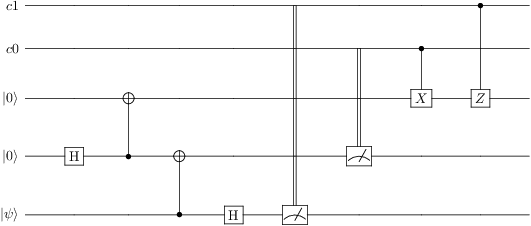

In [12]:
teleportation.png

Lets now apply this circuit to an example. Suppose we set the initial state psi to be in the + state

In [13]:
a = 1/sqrt(2) * basis(2,0) + 1/sqrt(2)*basis(2,1)  #defining + state
state = tensor(a, basis(2,0), basis(2,0))  #setting 3 qubits to be + 0 0

We can confirm our state is initialized correctly by observing the measurement statisicits on qubit q0, Note that Qobj has the following attributes: <br>
dimensions of tensor structure <br>
shape of of Qobj data <br>
type of quantum object - bra, ket, super, etc.


In [14]:
initial_measurement = Measurement("start", targets=[0]) #measure q0
initial_measurement.measurement_comp_basis(state) 

([Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]],
  Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]]],
 [0.4999999999999999, 0.4999999999999999])

The circuit object QubitCircuit has a method "run" which can run the circuit we previously made when provided with an initial state vector or density matrix and provides the final state as a "result" object. Note: any classical bits can also be explicitly set using the argument cbits.

In [15]:
state_final = teleportation.run(state) #run intial state set up on circuit
print(state_final)

Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.70710678]
 [0.70710678]]


After running that, we can see the measurement stats on the last qubit to see that teleportation did indeed occur.

In [16]:
final_measurement = Measurement("start", targets=[2]) #Measure q2 to check if the intial q0 value was teleported 
final_measurement.measurement_comp_basis(state_final)

([Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]],
  Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [1.]]],
 [0.4999999999999999, 0.4999999999999999])

Lets do one more example with the intial state of phi being set to 1.

In [17]:
state = tensor(basis(2,1), basis(2,0), basis(2,0)) #set qubits to 1 0 0 -> q0 q1 q2 
initial_measurement = Measurement("start", targets=[0]) #measure intial qubit q0, should be a 1 as it was set
initial_measurement.measurement_comp_basis(state)

([None,
  Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[0.]
   [0.]
   [0.]
   [0.]
   [1.]
   [0.]
   [0.]
   [0.]]],
 [0.0, 1.0])

In [18]:
state_final = teleportation.run(state)
print(state_final)

Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [19]:
final_measurement = Measurement("start", targets=[2]) #measure state of q2 to check that it matches q0
final_measurement.measurement_comp_basis(state_final)

([None,
  Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
  Qobj data =
  [[0.]
   [1.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]
   [0.]]],
 [0.0, 1.0])

Another cool feature that QuTip has is to get the circuit stats using the QubitCircuit.run_statistics() feature, which give you all the possible output states of the circuit with their probabilities.

In [22]:
results = teleportation.run_statistics(state)
results.probabilities

[0.24999999999999994,
 0.24999999999999994,
 0.24999999999999994,
 0.24999999999999994]

In [23]:
results.final_states

[Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]
  [0.]
  [0.]],
 Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]
  [0.]
  [0.]],
 Quantum object: dims=[[2, 2, 2], [1, 1, 1]], shape=(8, 1), type='ket', dtype=Dense
 Qobj data =
 [[0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [0.]
  [1.]]]

In [19]:
about()


QuTiP: Quantum Toolbox in Python
Copyright (c) QuTiP team 2011 and later.
Current admin team: Alexander Pitchford, Nathan Shammah, Shahnawaz Ahmed, Neill Lambert, Eric Giguère, Boxi Li, Jake Lishman, Simon Cross and Asier Galicia.
Board members: Daniel Burgarth, Robert Johansson, Anton F. Kockum, Franco Nori and Will Zeng.
Original developers: R. J. Johansson & P. D. Nation.
Previous lead developers: Chris Granade & A. Grimsmo.
Currently developed through wide collaboration. See https://github.com/qutip for details.

QuTiP Version:      5.0.1
Numpy Version:      1.24.4
Scipy Version:      1.9.1
Cython Version:     0.29.32
Matplotlib Version: 3.5.2
Python Version:     3.9.13
Number of CPUs:     8
BLAS Info:          OPENBLAS
INTEL MKL Ext:      False
Platform Info:      Windows (AMD64)
Installation path:  C:\Users\jgath\anaconda3\lib\site-packages\qutip
Please cite QuTiP in your publication.
For your convenience a bibtex reference can be easily generated using `qutip.cite()`
